# k-means
### Dataset: [Dry_Bean_Dataset.xlsx](../../input/Dry_Bean_Dataset_Citation_Request.txt)

<a id="1"></a>
## Import modules

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import plotly.express as px


<a id="2"></a>
## Loading dataset

In [8]:
filename = '../../input/Dry_Bean_Dataset.xlsx'
try:
    df = pd.read_excel(filename)
except FileNotFoundError:
    print("File not found. Check the file path and try again.")
    # Optionally, you can exit the script if the file is not found
    # import sys
    # sys.exit()

print(df.head())

# Output column names to verify them
print("Column names:", df.columns.tolist())

# Specify the features and target column based on your dataset
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity']
target = 'Class'

# Ensure that the specified column names exist in the DataFrame
if not all(feature in df.columns for feature in features):
    print("One or more feature columns are missing in the DataFrame.")
else:
    X = df[features].values

if target not in df.columns:
    print(f"The target column '{target}' is missing in the DataFrame.")
else:
    y = df[target].values

File not found. Check the file path and try again.
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  S

In [9]:
columns_to_plot = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity']

fig = px.scatter_matrix(df, dimensions=columns_to_plot, color='Class')
fig.show()

<a id="3"></a>
## Standardize the data

In [10]:
X_norm = StandardScaler().fit_transform(X)

print(X_norm)

[[-0.84074853 -1.1433189  -1.30659814 -0.63115304 -1.56505251 -2.18572039]
 [-0.82918764 -1.01392388 -1.39591111 -0.43444458 -1.96978438 -3.68603953]
 [-0.80715717 -1.07882906 -1.25235661 -0.58573461 -1.51429132 -2.04533608]
 ...
 [-0.37203825 -0.44783294 -0.45047814 -0.24645586 -0.4486176  -0.18293961]
 [-0.37176543 -0.42702856 -0.42897404 -0.26674226 -0.38073532 -0.10695995]
 [-0.37135619 -0.38755718 -0.2917356  -0.44622403  0.14837437  0.38911648]]


<a id="4"></a>
## Get the K value

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

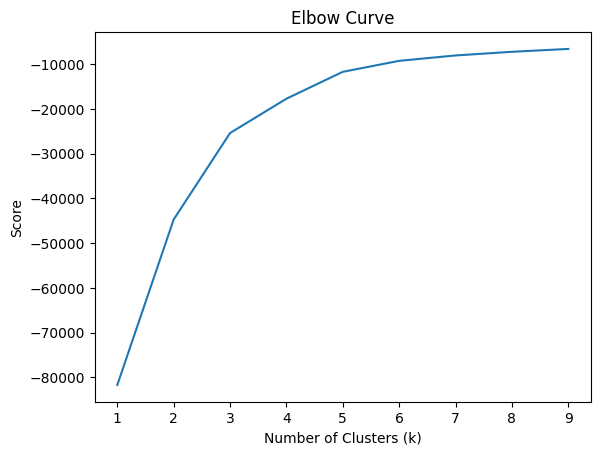

In [11]:
nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in nc]

score = [kmeans[i].fit(X_norm).score(X_norm) for i in range(len(kmeans))]

plt.plot(nc, score)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<a id="5"></a>
## K-means execution

In [17]:
n_classes =  np.unique(y).size

kmeans = KMeans(n_clusters=n_classes, init="random", n_init=10, max_iter=300, algorithm = 'auto')
kmeans.fit(X_norm)

centroids = kmeans.cluster_centers_
print(centroids)

df['KMeans_clusters'] = kmeans.labels_
df.head()

[[ 4.11484654  3.41391243  3.1929182   3.82987818  0.01375526  0.21912232]
 [ 0.57471683  0.84963582  0.5185038   0.94295273 -0.36273907 -0.13823385]
 [-0.46671362 -0.62085844 -0.83960652 -0.01438915 -1.42588408 -1.90172894]
 [ 0.78734571  1.01562385  1.06459227  0.77365632  0.62332043  0.70967029]
 [-0.28050551 -0.26219564 -0.22432537 -0.27027691  0.00786466  0.24044232]
 [-0.71609284 -0.8938612  -0.87697472 -0.79935027 -0.43502927 -0.20726773]
 [ 0.02762403  0.31414771  0.63723384 -0.41081939  1.85821758  1.29836686]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,KMeans_clusters
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,2
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,2
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,2
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,2


<a id="6"></a>
## Visualize 2D Projection

['SEKER' 'SEKER' 'SEKER' ... 'DERMASON' 'DERMASON' 'DERMASON']


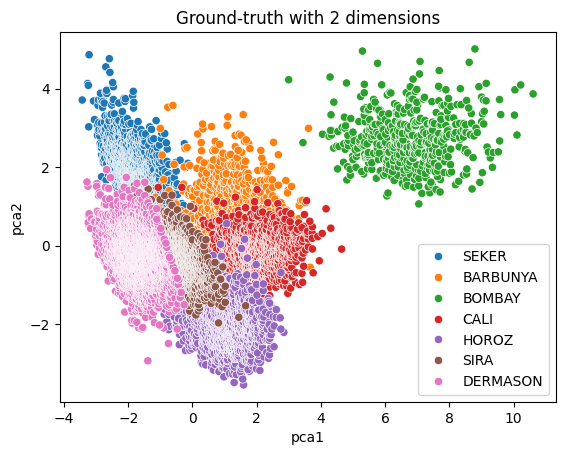

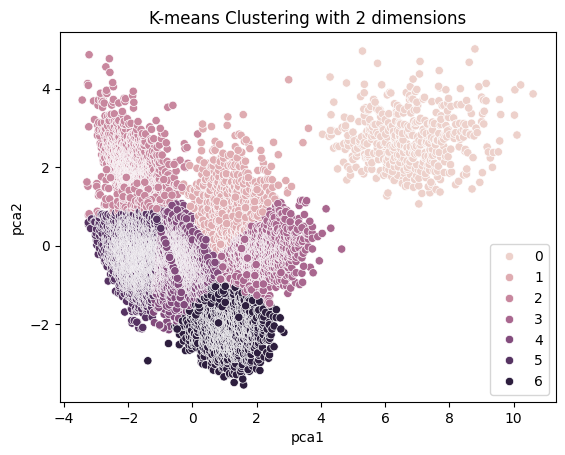

In [18]:
reduced_data = PCA(n_components=2).fit_transform(X_norm)
results = pd.DataFrame(data=reduced_data, columns=['pca1','pca2'])

print(y.flatten())

sb.scatterplot(x="pca1", y="pca2", hue=y.flatten(), data=results)
plt.title('Ground-truth with 2 dimensions')
plt.show()


sb.scatterplot(x="pca1", y="pca2", hue=kmeans.labels_, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<a id="7"></a>
## Visualize 3D Projection

           pca1      pca2      pca3
0     -2.831638  1.755679  0.456804
1     -3.228528  3.030548  1.281922
2     -2.689042  1.670730  0.392364
3     -2.825887  2.318291  0.750175
4     -3.432916  3.713527  1.785648
...         ...       ...       ...
13606 -0.711187 -0.297844 -0.213604
13607 -0.877721  0.134360 -0.199226
13608 -0.877616  0.160700 -0.196393
13609 -0.827530  0.065601 -0.202020
13610 -0.546500 -0.640134 -0.189974

[13611 rows x 3 columns]


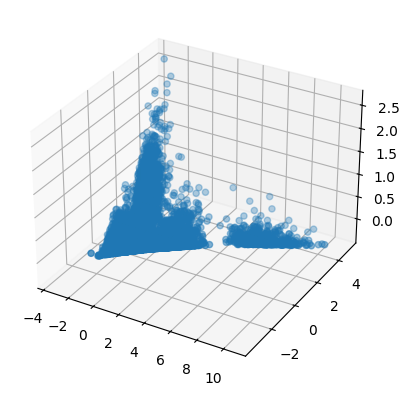

In [19]:
reduced_data = PCA(n_components=3).fit_transform(X_norm)
results = pd.DataFrame(data=reduced_data, columns=['pca1','pca2','pca3'])
print(results)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(results['pca1'], results['pca2'], results['pca3'])
plt.show()